In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import seaborn as sns
from sklearn.datasets import load_boston

In [2]:
df = load_boston()
print(df.data.shape)

(506, 13)


In [3]:
boston = pd.DataFrame(df.data, columns=df.feature_names)
boston.head(10)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
5     18.7  394.12   5.21  
6     15.2  395.60  12.43  
7     15.2  396.90  19.15  
8     15.2  386.63  29.93  
9     15.2  386.71  17.10

In [4]:
boston['MEDV'] = df.target
boston.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


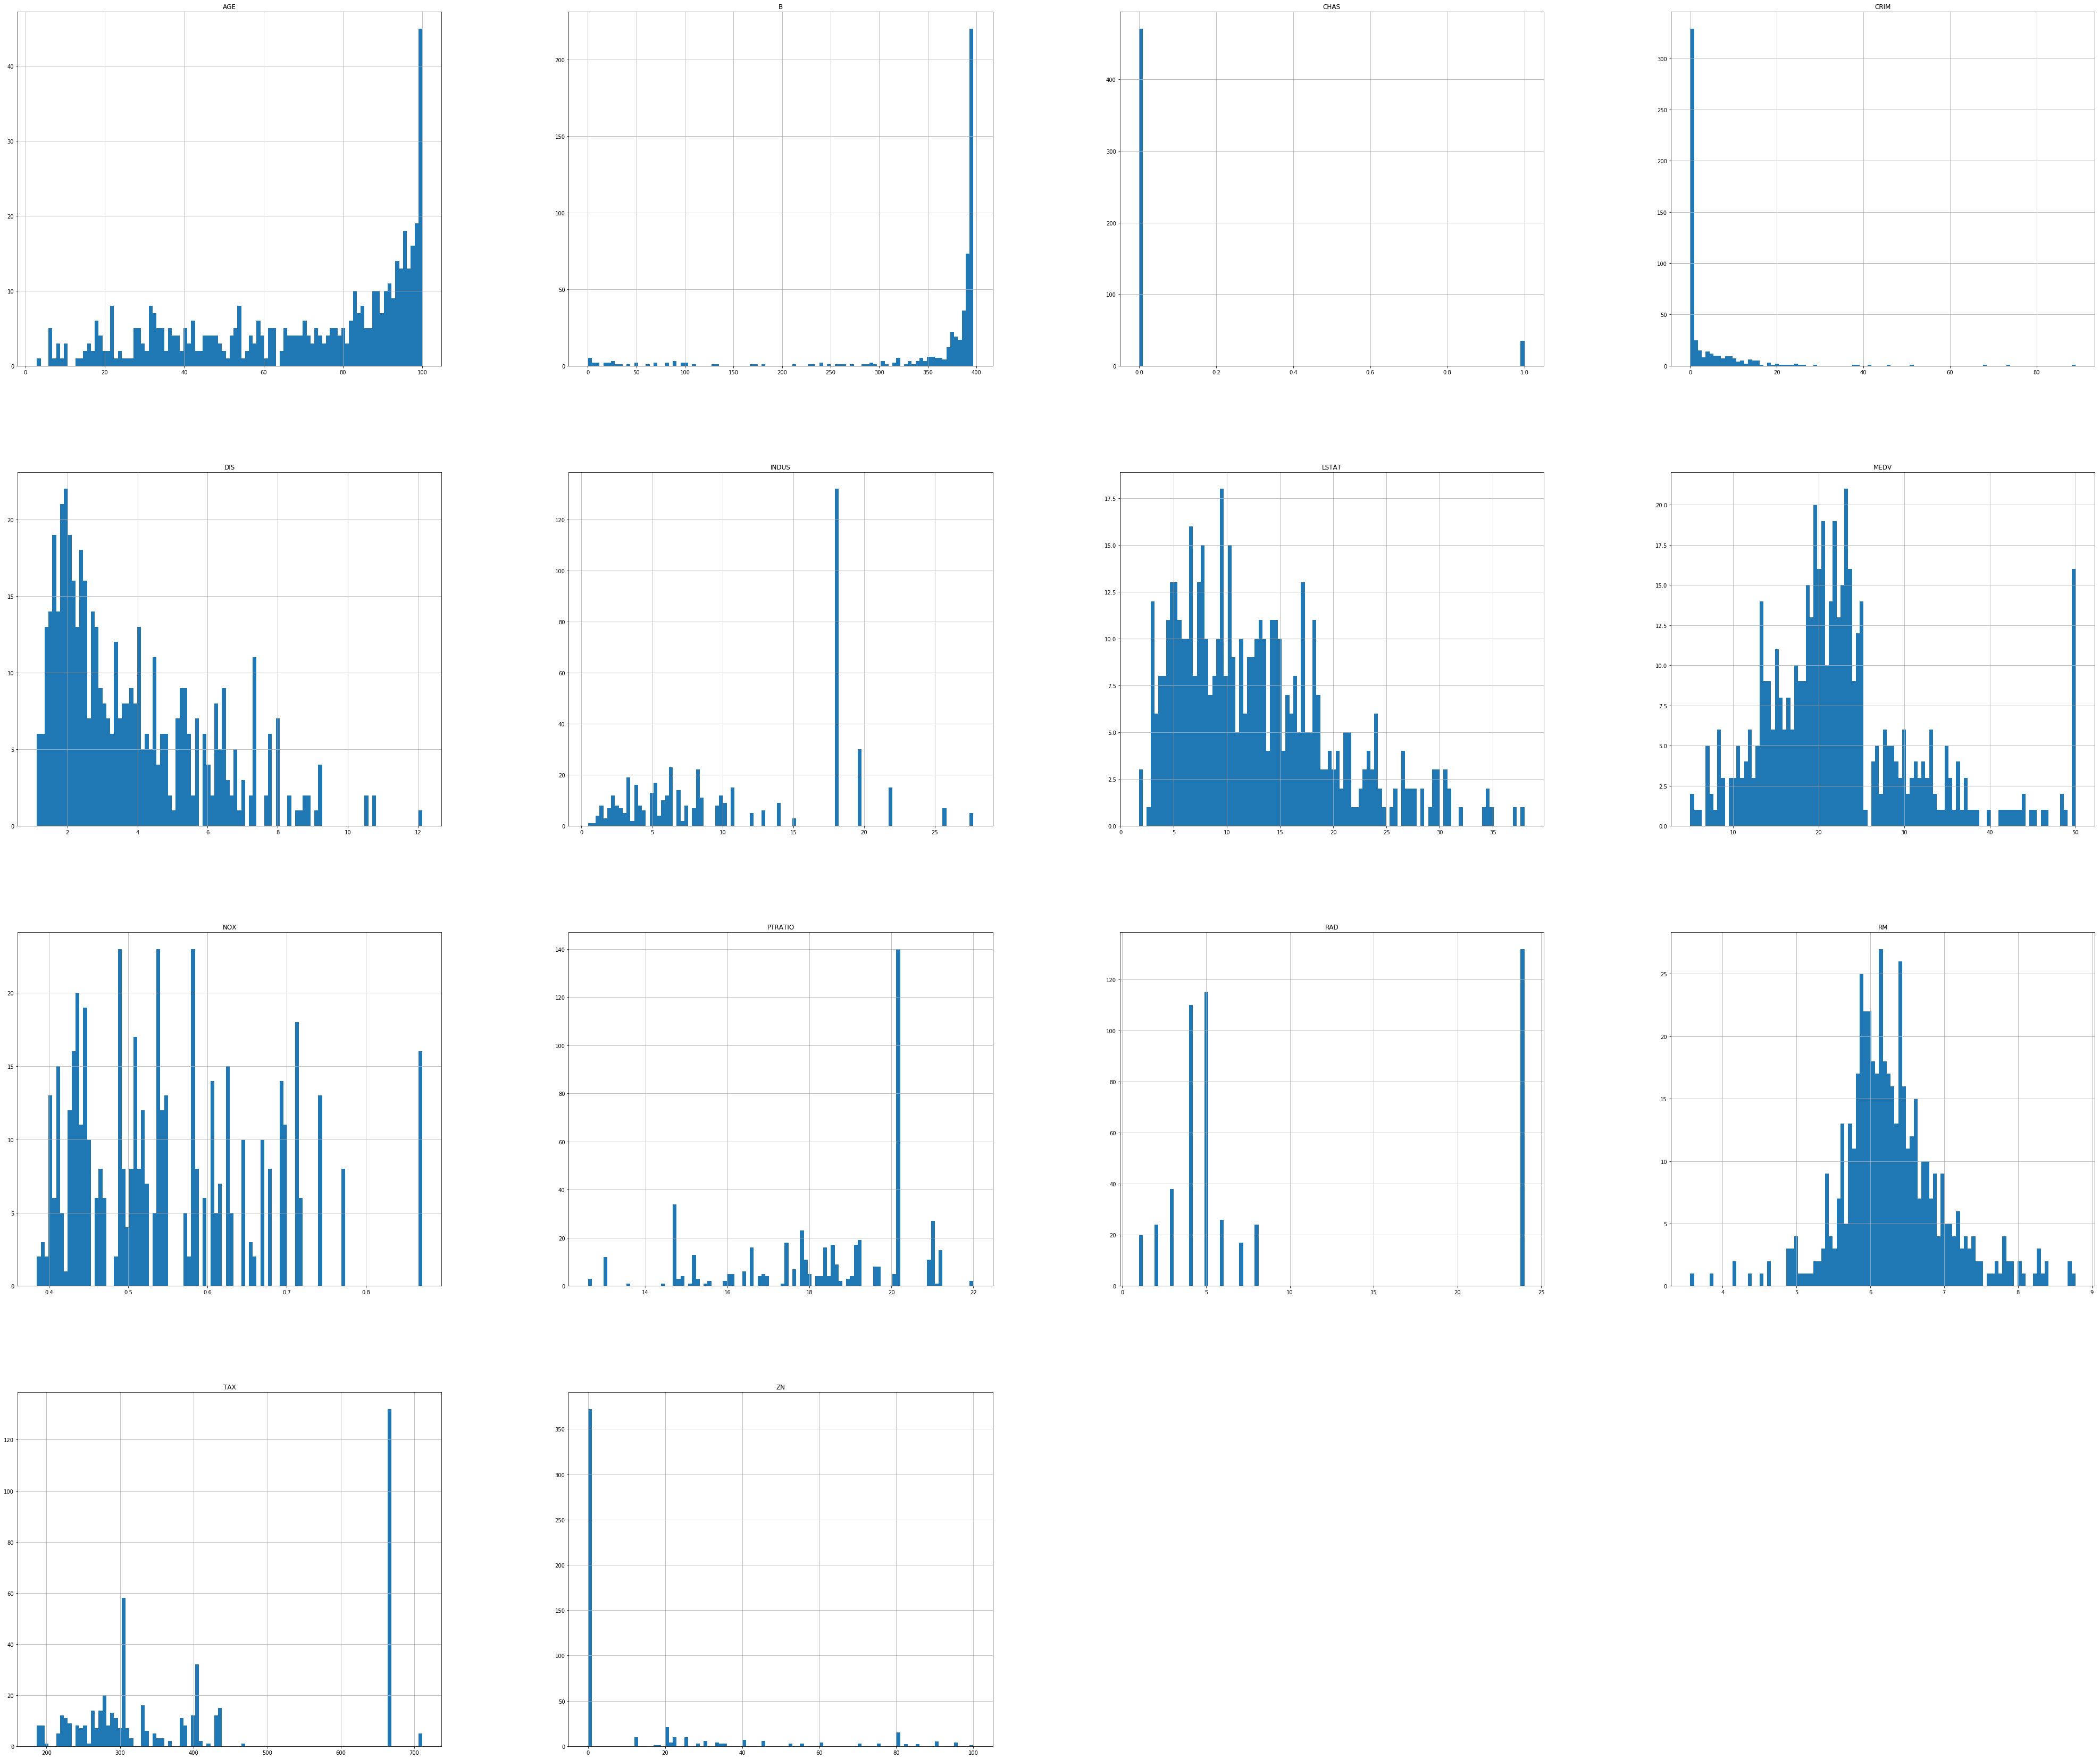

In [6]:
boston.hist(bins=100, figsize=(70,60))
plt.show()

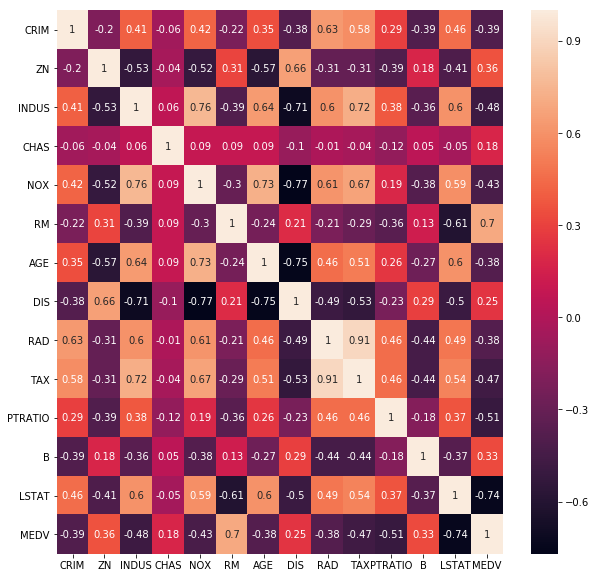

In [7]:
correlation_matrix = boston.corr().round(2)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data= correlation_matrix, annot=True)

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(boston, test_size=0.2, random_state=42)
print(len(train_set), "train ,", len(test_set), "test")

404 train , 102 test


In [9]:
boston1 = train_set.copy()
from sklearn.linear_model import LinearRegression
X = boston1[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 
            'B', 'LSTAT']]
Y = boston1['MEDV']
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
from sklearn.metrics import mean_squared_error
prediction = lin_reg.predict(X)
lin_mse = mean_squared_error(Y, prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.6520331848801675

In [11]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [12]:
prediction1 = tree_reg.predict(X)
tree_mse = mean_squared_error(Y, prediction1)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X, Y, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())
display_scores(tree_rmse_scores)

Scores: [3.75983264 3.97611773 4.45013017 6.77470187 7.70618258 4.05182058
 5.33277601 5.99138966 4.21203632 5.47325315]
Mean: 5.1728240702537915
Standard deviation: 1.2609722020332392


In [14]:
lin_scores = cross_val_score(lin_reg, X, Y, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [3.76298481 4.25110998 5.34719644 6.71464778 4.59265163 5.17395941
 4.43145447 4.5777583  3.6723473  5.77030866]
Mean: 4.829441880454267
Standard deviation: 0.8896329730748647


In [15]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X,Y)
prediction2 = forest_reg.predict(X)
forest_mse = mean_squared_error(Y, prediction2)
forest_rmse = np.sqrt(forest_mse)
forest_rmse
scores = cross_val_score(forest_reg, X, Y, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

C:\Users\mtice\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores: [3.12912947 3.94570096 3.15880071 5.03382389 4.30723113 3.33506447
 3.90829087 3.72397905 2.77521756 4.8621397 ]
Mean: 3.817937781277508
Standard deviation: 0.7120962489761961


In [16]:
from sklearn.model_selection import GridSearchCV
grid_param = {  
    'n_estimators': [400, 450, 500, 550, 600],
    'max_features': [2,3,4,5,6,7]
}
gd_sr = GridSearchCV(estimator=forest_reg,  
                     param_grid=grid_param,
                     scoring='neg_mean_squared_error',
                     cv=5,refit=True)
gd_sr.fit(X,Y)

C:\Users\mtice\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [400, 450, 500, 550, 600], 'max_features': [2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [17]:
gd_sr.best_params_

{'max_features': 5, 'n_estimators': 500}

In [18]:
final_model = gd_sr.best_estimator_

In [19]:
feature_importance = gd_sr.best_estimator_.feature_importances_
feature_importance

array([0.05252492, 0.00432653, 0.05616363, 0.00630421, 0.06443836,
       0.32801396, 0.02241763, 0.05254646, 0.00883182, 0.02607986,
       0.05594872, 0.01875382, 0.3036501 ])

In [20]:
X_test = test_set.drop("MEDV", axis=1)
Y_test = test_set["MEDV"].copy()
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2.9920392459023075